In [1]:
import pandas as pd
import csv
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import hvplot.pandas as hvplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Read in Senator's  transaction data from a csv.

In [2]:
tickers_data = Path("/Users/matt/Desktop/senator_trading_performance/senators_fixed_dates_&amounts.csv")
tickers_data_df = pd.read_csv(tickers_data, infer_datetime_format=True, parse_dates=True)

tickers_data_df

,transaction_date,owner,ticker,asset_type,type,amount,state,industry,senator
0,4/18/2023,Spouse,ESS,Stock,Sale (Full),"$15,000",RI,Real Estate Investment Trusts,Sheldon Whitehouse
1,4/18/2023,Self,ESS,Stock,Sale (Full),"$15,000",RI,Real Estate Investment Trusts,Sheldon Whitehouse
2,5/16/2023,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Michael F. Bennet
3,4/4/2023,Spouse,UPS,Stock,Sale (Full),"$15,000",WV,Trucking Freight/Courier Services,Shelley Moore Capito
4,4/4/2023,Spouse,MCD,Stock,Sale (Partial),"$15,000",WV,Restaurants,Shelley Moore Capito
...,...,...,...,...,...,...,...,...,...
8441,8/17/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Sheldon Whitehouse
8442,8/16/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Pat Roberts
8443,8/15/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Rob Portman
8444,8/2/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,Thomas R. Carper


In [3]:
tickers_df_dropped=tickers_data_df.dropna()
tickers_df_dropped.head

<bound method NDFrame.head of      transaction_date   owner ticker asset_type            type     amount  \
0           4/18/2023  Spouse    ESS      Stock     Sale (Full)   $15,000    
1           4/18/2023    Self    ESS      Stock     Sale (Full)   $15,000    
3            4/4/2023  Spouse    UPS      Stock     Sale (Full)   $15,000    
4            4/4/2023  Spouse    MCD      Stock  Sale (Partial)   $15,000    
5            4/4/2023  Spouse    DUK      Stock     Sale (Full)   $50,000    
...               ...     ...    ...        ...             ...        ...   
7627        1/16/2015    Self    NOG      Stock        Purchase   $50,000    
7628         1/6/2015    Self    FCX      Stock     Sale (Full)  $100,000    
7640       12/12/2014  Spouse    XOM      Stock     Sale (Full)   $15,000    
7641       12/19/2014  Spouse     BA      Stock        Purchase   $15,000    
7642       12/12/2014  Spouse    BAC      Stock     Sale (Full)   $15,000    

     state                       

In [4]:
tickers_df=pd.DataFrame(tickers_df_dropped)
# tickers_df

tickers_df=tickers_df[['transaction_date', 'ticker', 'type', 'amount', 'senator']]
display(tickers_df)

,transaction_date,ticker,type,amount,senator
0,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
1,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
3,4/4/2023,UPS,Sale (Full),"$15,000",Shelley Moore Capito
4,4/4/2023,MCD,Sale (Partial),"$15,000",Shelley Moore Capito
5,4/4/2023,DUK,Sale (Full),"$50,000",Shelley Moore Capito
...,...,...,...,...,...
7627,1/16/2015,NOG,Purchase,"$50,000",John Hoeven
7628,1/6/2015,FCX,Sale (Full),"$100,000",John Hoeven
7640,12/12/2014,XOM,Sale (Full),"$15,000",Pat Roberts
7641,12/19/2014,BA,Purchase,"$15,000",Pat Roberts


In [5]:
tickers_counts=tickers_df['ticker'].value_counts()
msft_counts=tickers_counts['MSFT']


msft_counts

96

Identify the most common tickers traded by the Senators

In [6]:
most_common_ticker=tickers_df['ticker'].value_counts().head(5)
most_common_ticker

AAPL    168
MSFT     96
BAC      81
DIS      79
PFE      77
Name: ticker, dtype: int64

Concatinate the individual dataframes of the top traded tickers which include the transaction date, type of transaction, amount invested, and the specific Senator.

In [7]:
msft_filtered_df=tickers_df[(tickers_df['ticker']=='MSFT') & (tickers_df['amount'])]
# display(msft_filtered_df)

aapl_filtered_df=tickers_df[(tickers_df['ticker']=='AAPL') & (tickers_df['amount'])]
# display(aapl_filtered_df)

bac_filtered_df=tickers_df[(tickers_df['ticker']=='BAC') & (tickers_df['amount'])]
# display(bac_filtered_df)

dis_filtered_df=tickers_df[(tickers_df['ticker']=='DIS') & (tickers_df['amount'])]
# display(dis_filtered_df)

pfe_filtered_df=tickers_df[(tickers_df['ticker']=='PFE') & (tickers_df['amount'])]
# display(pfe_filtered_df)

combined_data=pd.concat([msft_filtered_df, aapl_filtered_df, bac_filtered_df, dis_filtered_df, pfe_filtered_df], axis=0)
display(combined_data)


,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
301,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
309,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
...,...,...,...,...,...
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7326,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [8]:
dup_drop=combined_data.drop_duplicates()
dup_drop

,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
323,11/23/2022,MSFT,Sale (Full),"$50,000",Tommy Tuberville
324,11/23/2022,MSFT,Purchase,"$15,000",Tommy Tuberville
...,...,...,...,...,...
6963,9/16/2015,PFE,Purchase,"$15,000",Gary C. Peters
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [9]:
ready_csv_data=dup_drop.dropna()#.set_index('transaction_date')
display(ready_csv_data)



,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
323,11/23/2022,MSFT,Sale (Full),"$50,000",Tommy Tuberville
324,11/23/2022,MSFT,Purchase,"$15,000",Tommy Tuberville
...,...,...,...,...,...
6963,9/16/2015,PFE,Purchase,"$15,000",Gary C. Peters
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [10]:
# duration=180
# for idx, row in senator_trades_df.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
#     df_in_timeframe=yf_data.loc[start:start+duration, ticker]
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     senator_trades_df.loc[idx, f'{duration}_days_return']=return_in_timeframe

Concat the 5 tickers close prices into one df and input into the for loop for yf_data

Bring in data from the Yahoo Finance API and speficy to bring the past nine year worth of data because that is the first recorded trade made by one of the Senators. Also bring in returns from the S&P500 equity ticker  "SPY".

In [11]:
import yfinance as yf
from datetime import datetime, timedelta

# 6 years of data
nine_year_end_date = datetime.today()
nine_year_start_date = nine_year_end_date - timedelta(days=365*9)

# # 30 days of data
# month_end_date = datetime.today()
# month_start_date = end_date - timedelta(days=30)

# # 90 days of data
# three_month_end_date = datetime.today()
# three_month_start_date = end_date - timedelta(days=90)

# # 180 days of data
# six_month_end_date = datetime.today()
# six_month_start_date = six_month_end_date - timedelta(days=180)

msft_tickers = yf.Tickers('MSFT')
msft_data=msft_tickers.tickers['MSFT'].history(start=nine_year_start_date, end=nine_year_end_date)
msft_ticker_df=pd.DataFrame(msft_data)
msft_ticker_df.index=msft_ticker_df.index.date
# msft_ticker_df

aapl_tickers=yf.Tickers('AAPL')
aapl_data=aapl_tickers.tickers['AAPL'].history(start=nine_year_start_date, end=nine_year_end_date)
aapl_ticker_df=pd.DataFrame(aapl_data)
aapl_ticker_df.index=aapl_ticker_df.index.date
# aapl_ticker_df


bac_tickers=yf.Tickers('BAC')
bac_data=bac_tickers.tickers['BAC'].history(start=nine_year_start_date, end=nine_year_end_date)
bac_ticker_df=pd.DataFrame(bac_data)
bac_ticker_df.index=bac_ticker_df.index.date
# bac_ticker_df

dis_tickers=yf.Tickers('DIS')
dis_data=dis_tickers.tickers['DIS'].history(start=nine_year_start_date, end=nine_year_end_date)
dis_ticker_df=pd.DataFrame(dis_data)
dis_ticker_df.index=dis_ticker_df.index.date
# dis_ticker_df

pfe_tickers=yf.Tickers('PFE')
pfe_data=pfe_tickers.tickers['PFE'].history(start=nine_year_start_date, end=nine_year_end_date)
pfe_ticker_df=pd.DataFrame(pfe_data)
pfe_ticker_df.index=pfe_ticker_df.index.date
# pfe_ticker_df

spy_tickers=yf.Tickers('SPY')
spy_data=spy_tickers.tickers['SPY'].history(start=nine_year_start_date, end=nine_year_end_date)
spy_ticker_df=pd.DataFrame(spy_data)
spy_ticker_df.index=spy_ticker_df.index.date
# spy_ticker_df

Filter out the daily close price from each of the transaction dates and 

In [12]:
msft_filtered_ticker_df=msft_ticker_df[['Close']]
# msft_filtered_ticker_df

aapl_filtered_ticker_df=aapl_ticker_df[['Close']]
# display(aapl_filtered_ticker_df)

bac_filtered_ticker_df=bac_ticker_df[['Close']]
# display(bac_filtered_ticker_df)


dis_filtered_ticker_df=dis_ticker_df[['Close']]
# display(dis_filtered_ticker_df)


pfe_filtered_ticker_df=pfe_ticker_df[['Close']]
# display(pfe_filtered_ticker_df)

spy_filtered_ticker_df=spy_ticker_df[['Close']]
# display(spy_filtered_ticker_df)


ready_ticker_data=pd.concat([msft_filtered_ticker_df, aapl_filtered_ticker_df, bac_filtered_ticker_df, dis_filtered_ticker_df, pfe_filtered_ticker_df, spy_filtered_ticker_df], axis=1, keys=['MSFT', 'AAPL', 'BAC', 'DIS', 'PFE', 'S&P500']).dropna()
display(ready_ticker_data)

,MSFT,AAPL,BAC,DIS,PFE,S&P500
,Close,Close,Close,Close,Close,Close
2014-08-11,37.061386,21.445503,12.801787,80.527664,19.267242,164.482208
2014-08-12,37.335930,21.441042,12.793377,80.260773,19.151293,164.253082
2014-08-13,37.816345,21.724777,12.827021,80.619698,19.239960,165.364899
2014-08-14,37.979336,21.782858,12.885898,81.549225,19.594616,166.145706
2014-08-15,38.425438,21.890104,12.801787,82.165833,19.533234,166.111771
...,...,...,...,...,...,...
2023-08-01,336.339996,195.610001,31.620001,89.029999,35.610001,456.480011
2023-08-02,327.500000,192.580002,31.190001,86.300003,35.349998,450.130005
2023-08-03,326.660004,191.169998,31.410000,85.489998,35.000000,448.839996


In [13]:
ready_ticker_data.columns

MultiIndex([(  'MSFT', 'Close'),
            (  'AAPL', 'Close'),
            (   'BAC', 'Close'),
            (   'DIS', 'Close'),
            (   'PFE', 'Close'),
            ('S&P500', 'Close')],
           )

In [14]:
new_cols=[col for col, close_col in ready_ticker_data.columns]

ready_ticker_data.columns=new_cols

ready_ticker_data.head()

,MSFT,AAPL,BAC,DIS,PFE,S&P500
2014-08-11,37.061386,21.445503,12.801787,80.527664,19.267242,164.482208
2014-08-12,37.335930,21.441042,12.793377,80.260773,19.151293,164.253082
2014-08-13,37.816345,21.724777,12.827021,80.619698,19.239960,165.364899
2014-08-14,37.979336,21.782858,12.885898,81.549225,19.594616,166.145706
2014-08-15,38.425438,21.890104,12.801787,82.165833,19.533234,166.111771


In [15]:
ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

duration=30
for duration in [30, 60, 90, 180]: 
    for idx, row in ready_csv_data.iterrows(): 
        start=row['transaction_date'] # 2020-01-03
        ticker=row['ticker'] # AAPL
        
        if ticker not in ready_ticker_data.columns:
            continue
            
        end =start+timedelta(days=duration)
        df_in_timeframe=ready_ticker_data.loc[start:end, [ticker, 'S&P500']]
    
        
        if df_in_timeframe.empty:
            continue
            
        return_in_timeframe=df_in_timeframe.iloc[-1, 0]/df_in_timeframe.iloc[0, 0]
        sp_return_in_timeframe=df_in_timeframe.iloc[-1, 1]/df_in_timeframe.iloc[0, 1]
        excess_return=return_in_timeframe-sp_return_in_timeframe
        ready_csv_data.loc[idx, f'{duration}_days_excess_return']=excess_return.item()

display(ready_csv_data)

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.050975
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
...,...,...,...,...,...,...,...,...,...
6963,2015-09-16,PFE,Purchase,"$15,000",Gary C. Peters,0.016355,-0.006244,-0.049433,-0.099211
7323,2015-04-29,PFE,Sale (Partial),"$15,000",David Perdue,0.019093,-0.003891,0.040496,0.019338
7325,2015-05-06,PFE,Sale (Partial),"$15,000",David Perdue,0.010512,-0.004028,0.067862,0.034508
7327,2015-05-07,PFE,Sale (Partial),"$15,000",David Perdue,0.010878,-0.004348,0.064405,0.029143


In [16]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=60
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue
        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [17]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=90
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue

        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [18]:
# ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])

# duration=180
# for idx, row in ready_csv_data.iterrows(): 
#     start=row['transaction_date'] # 2020-01-03
#     ticker=row['ticker'] # AAPL
    
#     if ticker not in ready_ticker_data.columns:
#         continue
        
#     end =start+timedelta(days=duration)
#     df_in_timeframe=ready_ticker_data.loc[start:end, ticker]

    
#     if df_in_timeframe.empty:
#         continue
        
#     return_in_timeframe=df_in_timeframe.iloc[-1]/df_in_timeframe.iloc[0]-1
#     ready_csv_data.loc[idx, f'{duration}_days_return']=return_in_timeframe.item()

# display(ready_csv_data)

In [33]:
display(ready_csv_data.head(10))


,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.050975
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
326,2022-11-22,MSFT,Sale (Partial),"$250,000",Tommy Tuberville,0.015675,-0.014124,0.032734,0.249657
359,2022-10-28,MSFT,Sale (Full),"$15,000",Tommy Tuberville,0.018007,0.022538,0.009177,0.210741
363,2022-10-24,MSFT,Purchase,"$50,000",Tommy Tuberville,-0.058002,-0.047042,-0.075389,0.064774
365,2022-10-13,MSFT,Purchase,"$500,000",Tommy Tuberville,-0.033971,-0.009082,-0.076339,0.084894
402,2022-10-05,MSFT,Sale (Partial),"$250,000",Tommy Tuberville,-0.109635,-0.052841,-0.050423,0.059776


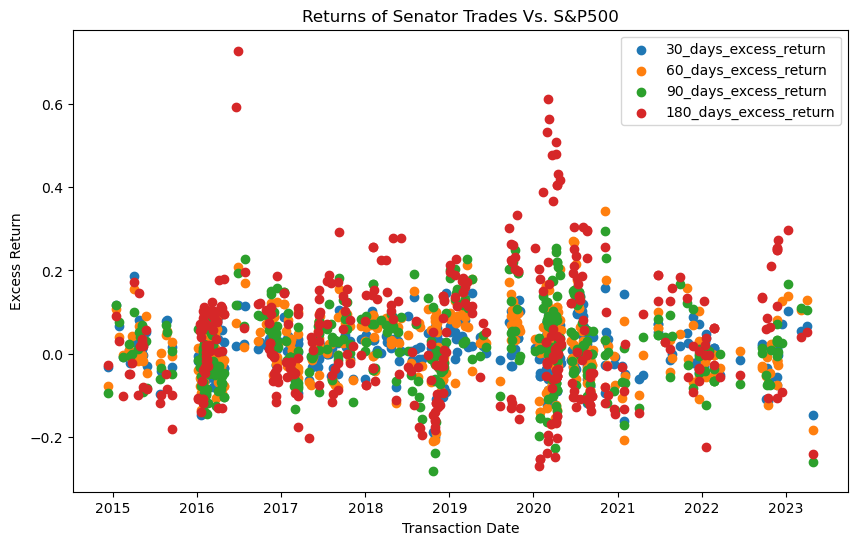

In [35]:
#  #Plot the 180 days excess return for APPL and BAC
# ready_csv_data.hvplot.line(ready_csv_data, x='transaction_date', y='180_days_excess_return', title='Returns of Senators over 30, 60, 90, 180 Day vs. S&P500', xlabel='Transaction Date', ylabel='180 Days Excess Return')

# # Add a title to the plot
# ready_csv_data.hvplot.title('180 Days Excess Return for First 10 Purchases')

# # Add labels to the x-axis and y-axis
# hvplot.xlabel('Transaction Date')
# hvplot.ylabel('180 Days Excess Return')

# # Show the plot
# hvplot.show()

# ready_csv_data['transaction_date'] = pd.to_datetime(ready_csv_data['transaction_date'])
# ready_csv_data.set_index('transaction_date', inplace=True)

# plot_csv=ready_csv_data.plot.line(x='transaction_date', y=['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return'], figsize=(10,6), title='Returns of Senator Trades Vs. S&P500', ylabel='Excess Return')
# plot_csv


# plot_csv = ready_csv_data.plot.barh(
#     x='transaction_date',
#     y=['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return'],
#     figsize=(10, 6),
#     title='Returns of Senator Trades Vs. S&P500',
#     ylabel='Excess Return'
# )

# plot_csv = ready_csv_data.plot.scatter(
#     x='transaction_date',
#     y=['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return'],
#     by='type',
#     legend='top',
#     title='Returns of Senator Trades Vs. S&P500',
#     height=400,
#     width=400
# )
# plot_csv



ready_csv_data['transaction_date'] = pd.to_datetime(ready_csv_data['transaction_date'])

plt.figure(figsize=(10, 6))

for col in ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']:
    plt.scatter(ready_csv_data['transaction_date'], ready_csv_data[col], label=col)

plt.xlabel('Transaction Date')
plt.ylabel('Excess Return')
plt.title('Returns of Senator Trades Vs. S&P500')
plt.legend()
plt.show()







In [21]:
ready_csv_data_summary=ready_csv_data[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].mean(s)
display(ready_csv_data)

30_days_excess_return     0.010534
60_days_excess_return     0.020555
90_days_excess_return     0.015741
180_days_excess_return    0.038492
dtype: float64

<Axes: >

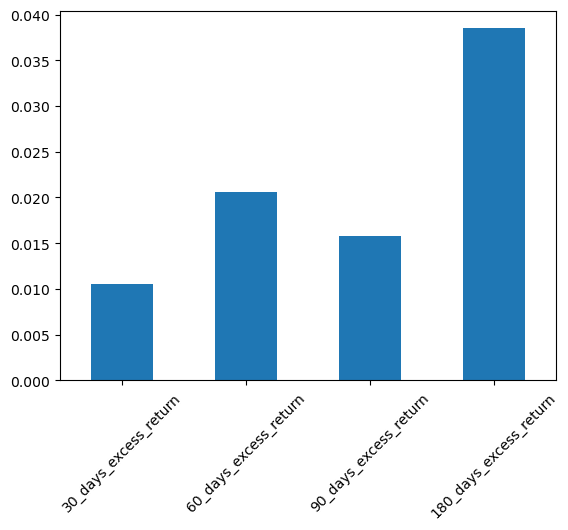

In [22]:
display(ready_csv_data_summary.plot.bar(rot=45))

When holding postions for over 180 the average return is 38%

In [23]:
mean_data=ready_csv_data[['type', '30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].groupby('type').mean()

<Axes: xlabel='180_days_excess_return'>

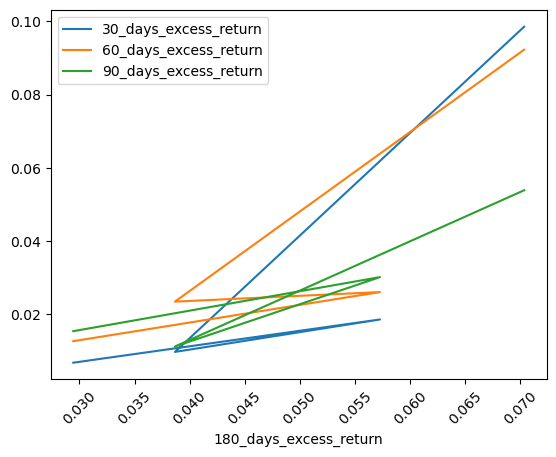

In [24]:
mean_data.plot(kind='line', rot=45, x='180_days_excess_return')

<Axes: xlabel='industry'>

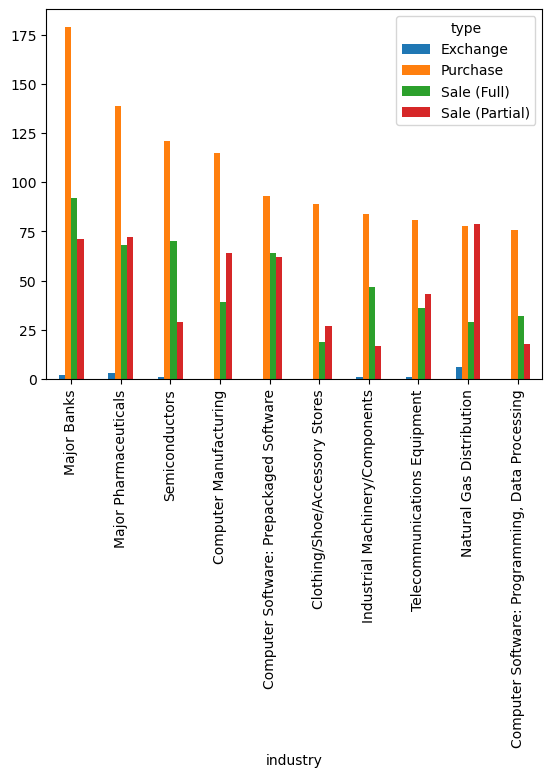

In [25]:
industry_agg=tickers_data_df.pivot_table(index='industry', columns='type', aggfunc='size').fillna(0)
industry_agg.sort_values('Purchase', ascending=False,).head(10).plot(kind='bar')

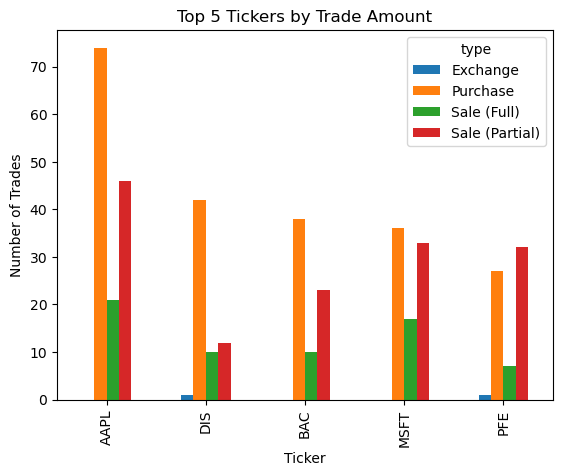

In [65]:
# industry_agg=ready_csv_data.pivot_table(index='ticker', columns='type', aggfunc='size').fillna(0)
# industry_agg_sorted=industry_agg.sort_values('Purchase', ascending=False,).head(10).plot(kind='bar' )



# Assuming you already have these variables
industry_agg = ready_csv_data.pivot_table(index='ticker', columns='type', aggfunc='size').fillna(0)
industry_agg_sorted = industry_agg.sort_values(by='Purchase', ascending=False)

# Plotting with title and axis labels
ax = industry_agg_sorted.head(10).plot(kind='bar')
ax.set_title('Top 5 Tickers by Trade Amount')
ax.set_xlabel('Ticker')
ax.set_ylabel('Number of Trades')
plt.show()



# columns_to_plot = ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']

# industry_agg=ready_csv_data.pivot_table(index='ticker', columns='type', aggfunc='size').fillna(0)
# industry_agg.sort_values(['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return'], ascending=False,).head(10).plot(kind='line')



# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you already have these variables
# columns_to_plot = ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']
# industry_agg = ready_csv_data.pivot_table(index='ticker', columns='type', aggfunc='size').fillna(0)
# industry_agg_sorted = industry_agg.sort_values(by='Purchase', ascending=False)

# # Plotting the selected columns for the top 10 rows
# industry_agg_sorted[columns_to_plot].head(10).plot(kind='bar')
# plt.xlabel('Ticker')
# plt.ylabel('Count')
# plt.title('Top 10 Tickers by Purchase Count')
# plt.show()




In [44]:
industry_agg.sort_values(('size', 'Purchase'), ascending=False).head(10).plot(kind='bar', y=[
    '30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return'
])

ready_csv_data

# sell_df=ready_csv_data[ready_csv_data['type']=='Sale (Full)']
# sell_df.groupby('ticker').size().plot(kind='bar')

KeyError: ('size', 'Purchase')

<Axes: xlabel='ticker'>

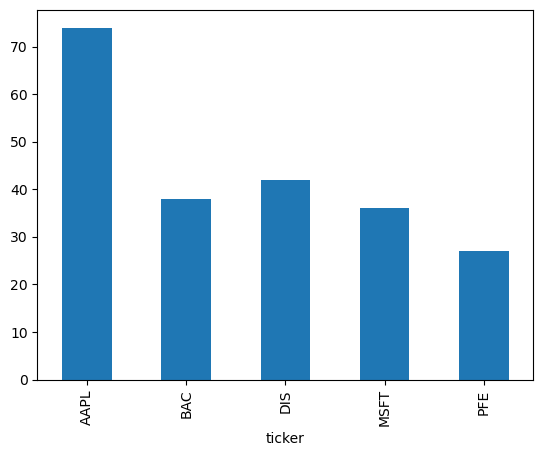

In [27]:
purchase_df=ready_csv_data[ready_csv_data['type']=='Purchase']
purchase_df.groupby('ticker').size().plot(kind='bar')

In [28]:
Most

NameError: name 'Most' is not defined

In [ ]:
purchase_df.groupby('senator').size().plot(kind='bar')

David Perdue is a good trader

In [ ]:
sns.heatmap(purchase_df.groupby('senator').mean())

fig, ax=plt.subplots(figsize

In [ ]:
purchase_df.sort_values('180_days_excess_return')

In [ ]:
bac_aapl_df = purchase_df[(purchase_df['ticker'] == 'AAPL') | (purchase_df['ticker'] == 'BAC')]

appl_180_days_excess_return = bac_aapl_df[bac_aapl_df['ticker'] == 'AAPL'].loc[:, '180_days_excess_return']
bac_180_days_excess_return = bac_aapl_df[bac_aapl_df['ticker'] == 'BAC'].loc[:, '180_days_excess_return']

plt.plot(appl_180_days_excess_return, label='APPL')
plt.plot(bac_180_days_excess_return, label='BAC')

plt.title('180 Days Excess Return for APPL and BAC')

plt.xlabel('Transaction Date')
plt.ylabel('180 Days Excess Return')

plt.show()


In [ ]:
purchase_df[purchase_df['ticker']=='AAPL']['180_days_excess_return'].plot(xlabel='180_days_excess_return')

In [ ]:
pos_indicator=ready_csv_data[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].applymap(lambda x: x>0)#.sort_values(
pd.concat([ready_csv_data[['type']], pos_indicator], axis=1).groupby('type').mean()
# (ready_csv_data[['type', '30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]>0).groupby('type').mean()
pos_indicator.plot

In [ ]:
neg_indicator=ready_csv_data[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].applymap(lambda x: x<0)#.sort_values(
pd.concat([ready_csv_data[['type']], neg_indicator], axis=1).groupby('type').mean()
# (ready_csv_data[['type', '30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]>0).groupby('type').mean()

In [ ]:
ready_csv_data[ready_csv_data['senator']=='Angus S. King, Jr.']


In [ ]:
ready_csv_data_indicator=ready_csv_data.copy()
indicator_mapping={'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
ready_csv_data_indicator['indicator']=ready_csv_data_indicator['type'].replace(indicator_mapping)
ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]=ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].multiply(ready_csv_data_indicator['indicator'], axis=0)>0
display(ready_csv_data_indicator.head(50))

In [ ]:
ready_csv_data_indicator[ready_csv_data_indicator['senator']=='Angus S. King, Jr.']

In [ ]:
print(ready_csv_data_indicator.columns)


In [ ]:
# ready_csv_data_indicator=ready_csv_data.copy()
# indicator_mapping={'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
# ready_csv_data_indicator['indicator']=ready_csv_data_indicator['type'].replace(indicator_mapping)
# ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]=ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].multiply(ready_csv_data['indicator'], axis=0)>0
# display(ready_csv_data_indicator)

# ready_csv_data_indicator=ready_csv_data.copy()
# indicator_mapping={'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
# ready_csv_data_indicator['indicator']=ready_csv_data_indicator['type'].replace(indicator_mapping)
# ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']]=ready_csv_data_indicator[['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']].multiply(ready_csv_data_indicator['indicator'], axis=0)>0
# display(ready_csv_data_indicator.head(50))





Compare the positive and negative indicator comparison with type

In [ ]:
compare_df=pd.DataFrame({'type': ['Sale (Partial)', 'Purchase', 'Sale (Full)'], 'indicator':[-1,0,1]})
compare_df['compare']=compare_df['type'] == compare_df['indicator']
display(compare_df.head(10))

In [ ]:
ready_csv_data_indicator['indicator'].value_counts().plot(kind='pie', figsize=(8, 8))


In [ ]:
ready_csv_data_indicator.groupby('amount').mean()

In [ ]:
ready_csv_data.head()

In [ ]:
ready_csv_data.groupby(['senator', 'type']).mean().sort_values('180_days_excess_return', ascending=False)

In [ ]:
ready_csv_data['transaction_date']=pd.to_datetime(ready_csv_data['transaction_date'])
ready_csv_data.dtypes

In [ ]:
ready_csv_data_indicator.hvplot.bar(x='transaction_date', y='indicator', color='type', width=1000, height=500, cmap=['Red', 'Green', 'Violet', 'Grey'])


In [ ]:
display(ready_csv_data_indicator)

In [ ]:
ready_csv_data_indicator.plot(kind='pie', y='180_days_excess_return')


In [ ]:
ready_csv_data_indicator.hvplot.bar(x='senator', y='30_days_excess_return', color='type', width=1000, height=500, cmap=['Blue', 'Yellow', 'Orange', 'Red'])

In [ ]:
ready_ticker_data.to_csv('/Users/matt/Desktop/senator_trading_performance/ready_ticker_data.csv', index=False)

pie chart compare net positve and negative trades. Groupby type of day.

In [ ]:

ready_csv_data_indicator = ready_csv_data.copy()
indicator_mapping = {'Sale (Partial)': -1, 'Purchase': 1, 'Sale (Full)': -1, 'Exchange': 0}
# Add a new column 'indicator' based on the mapping from 'type' column
ready_csv_data_indicator['indicator'] = ready_csv_data_indicator['type'].replace(indicator_mapping)
# Perform an operation on the excess return columns based on 'indicator' values
excess_return_columns = ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']
ready_csv_data_indicator[excess_return_columns] = ready_csv_data_indicator[excess_return_columns].multiply(ready_csv_data['indicator'], axis=0) > 0
# Display the resulting DataFrame
display(ready_csv_data_indicator)